# Final Results

This notebook contains all the code to generate the final plots that are going 
into the paper. It also has the commands used to run most of the experiments
ran during the review period for the paper (November).


## 0: Top-75 Shallow Reachability Experiment Script Calls

These experiments are on the k-epsilon controllability of the top 75 tokens of 
25 unique Wikitext sequences. 

We will leverage much of the same code from the [Deep Dive]() experiments: 

### Generating the Datasets

We want to get this done over night for a preliminary view tomorrow morning. So 
let's select 25 unique starting states $x_0$ and make a dataset where the desired 
tokens $y^*$ for each $x_0$ are the top 75 tokens in terms of $P(y^* | x_0)$. 

```bash 
>>> python3 scripts/generate_deep_dive.py \
    --input_file results/wiki_reachability/k10_falcon7b_wiki5k.csv \
    --output_file results/shallow_dive/falcon7b_top75_states25_1875.csv \
    --model falcon-7b \
    --skip -1 \
    --num_unique_states 25 \
    --num_shallow 75 
```


```bash
>>> python3 scripts/generate_deep_dive.py \
    --input_file results/wiki_reachability/k10_llama_7b_wiki5k.csv \
    --output_file results/shallow_dive/llama7b_top75_states25_1875.csv \
    --model llama-7b \
    --skip -1 \
    --num_unique_states 25 \
    --num_shallow 75 
```


```bash
>>> python3 scripts/generate_deep_dive.py \
    --input_file results/wiki_reachability/k10_falcon7b_wiki5k.csv \
    --output_file results/shallow_dive/falcon40b_top75_states10_750.csv \
    --model falcon-40b \
    --skip -1 \
    --num_unique_states 10 \
    --num_shallow 75

>>> python3 scripts/generate_deep_dive.py \
    --input_file results/wiki_reachability/k10_falcon7b_wiki5k.csv \
    --output_file results/shallow_dive/falcon40b_top75_states7_525.csv \
    --model falcon-40b \
    --skip -1 \
    --num_unique_states 7 \
    --num_shallow 75
```


### Falcon Reachability Experiments

Now we can run the `scripts/reachability.py` script on this dataset. I'll make a 
`falcon_shallowdive.sh` script so we can run it with the same convention as 
usual. 

```bash
CUDA_VISIBLE_DEVICES=0 bash scripts/shallow_dive_falcon7b.sh 0 8  # ran at ~4:30a on Sat Nov 18
CUDA_VISIBLE_DEVICES=1 bash scripts/shallow_dive_falcon7b.sh 1 8
CUDA_VISIBLE_DEVICES=2 bash scripts/shallow_dive_falcon7b.sh 2 8
CUDA_VISIBLE_DEVICES=3 bash scripts/shallow_dive_falcon7b.sh 3 8


CUDA_VISIBLE_DEVICES=0 bash scripts/shallow_dive_falcon7b.sh 4 8  # ran at ~4:30a on Sat Nov 18
CUDA_VISIBLE_DEVICES=1 bash scripts/shallow_dive_falcon7b.sh 5 8
CUDA_VISIBLE_DEVICES=2 bash scripts/shallow_dive_falcon7b.sh 6 8
CUDA_VISIBLE_DEVICES=3 bash scripts/shallow_dive_falcon7b.sh 7 8
```

### Llama Reachability Experiments


_Ran on Sun Nov 19 at ~9p_
```bash
# Superheavy 1
CUDA_VISIBLE_DEVICES=0 bash scripts/shallow_dive_llama7b.sh 0 16  
CUDA_VISIBLE_DEVICES=1 bash scripts/shallow_dive_llama7b.sh 1 16
CUDA_VISIBLE_DEVICES=2 bash scripts/shallow_dive_llama7b.sh 2 16
CUDA_VISIBLE_DEVICES=3 bash scripts/shallow_dive_llama7b.sh 3 16    

# Oracle Colossus
CUDA_VISIBLE_DEVICES=0 bash scripts/shallow_dive_llama7b.sh 4 16
CUDA_VISIBLE_DEVICES=1 bash scripts/shallow_dive_llama7b.sh 5 16
CUDA_VISIBLE_DEVICES=2 bash scripts/shallow_dive_llama7b.sh 6 16
CUDA_VISIBLE_DEVICES=3 bash scripts/shallow_dive_llama7b.sh 7 16

CUDA_VISIBLE_DEVICES=4 bash scripts/shallow_dive_llama7b.sh 8 16
CUDA_VISIBLE_DEVICES=5 bash scripts/shallow_dive_llama7b.sh 9 16
CUDA_VISIBLE_DEVICES=6 bash scripts/shallow_dive_llama7b.sh 10 16
CUDA_VISIBLE_DEVICES=7 bash scripts/shallow_dive_llama7b.sh 11 16

# Superheavy 3
CUDA_VISIBLE_DEVICES=0 bash scripts/shallow_dive_llama7b.sh 12 16  
CUDA_VISIBLE_DEVICES=1 bash scripts/shallow_dive_llama7b.sh 13 16
CUDA_VISIBLE_DEVICES=2 bash scripts/shallow_dive_llama7b.sh 14 16
CUDA_VISIBLE_DEVICES=3 bash scripts/shallow_dive_llama7b.sh 15 16    
```


### Falcon-40b Reachability 
```bash
bash scripts/shallow_dive_falcon40b.sh 0 4 # launched 8a Nov 20 
bash scripts/shallow_dive_falcon40b.sh 1 4 # launched 8a Nov 20 
CUDA_VISIBLE_DEVICE=0,1,2,3 bash scripts/shallow_dive_falcon40b.sh 2 4 # launched 8a Nov 20
CUDA_VISIBLE_DEVICE=4,5,6,7 bash scripts/shallow_dive_falcon40b.sh 3 4 # launched 8a Nov 20 
```

**Failed worker 2**: 
We will run worker 2's load on the 3 workers simultaneously as: 
```bash
# oracle 1
CUDA_VISIBLE_DEVICES=0,1,2,3 bash scripts/shallow_dive_falcon40b.sh 2 16
# oracle 2 
CUDA_VISIBLE_DEVICES=4,5,6,7 bash scripts/shallow_dive_falcon40b.sh 6 16
# superheavy 1 
bash scripts/shallow_dive_falcon40b.sh 10 16
# superheavy 2
bash scripts/shallow_dive_falcon40b.sh 14 16

```




### GPT-2 Reachability
```bash
# Make dataset (Done)
python3 scripts/make_control_dataset.py \
    --out_file datasets/k10_gpt2_wiki5k_init.csv \
    --model_name gpt2 \
    --question_lens 8 10 16 22 32 \
    --answer_lens 1 \
    --num_examples_per_qa_size 1000

# Run ground truth next token experiment 
python3 scripts/reachability.py \
    --input_file datasets/k10_gpt2_wiki5k_init.csv \
    --output_file results/wiki_reachability/k10_gpt2_wiki5k.csv \
    --model gpt-2-small 


# Make shallow dive dataset
python3 scripts/generate_deep_dive.py \
    --input_file results/wiki_reachability/k10_gpt2_wiki5k.csv \
    --output_file results/shallow_dive/init_gpt2_top75_states25_1875.csv \
    --model gpt-2-small \
    --skip -1 \
    --num_unique_states 25 \
    --num_shallow 75 

# Run shallow dive experiments
python3 scripts/reachability.py \
    --input_file results/shallow_dive/init_gpt2_top75_states25_1875.csv \
    --output_file results/shallow_dive/gpt2_top75_states25_1875.csv \
    --model gpt-2-small 
```

## 1: Setup

### 1.1: Imports & Constants

In [1]:
# Import box 
import pandas as pd 
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

from transformers import AutoTokenizer
from ast import literal_eval

/home/user/Magic_Words/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Tokenizers
falcon_tokenizer = AutoTokenizer.from_pretrained("tiiuae/falcon-7b")
llama_tokenizer = AutoTokenizer.from_pretrained("huggyllama/llama-7b")
gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [5]:
# Constants for plotting 
FIG_SIZE = (4, 3)

### 1.2: Global Plotting Functions

In [6]:
def add_zero_prompt_length(df_in): 
    # set prompt_length to zero when base_correct is true 
    df_in.loc[df_in['base_correct'] == True, 'prompt_length'] = 0
    return df_in
def overview_report(df_in): 
    print("Length of dataframe: ", len(df_in))
    print("Mean prompt correct (epsilon): \t", df_in['prompt_correct'].mean())
    print("Mean prompt correct with k <= 4: ", len(df_in[df_in['prompt_length'] <= 4]) / len(df_in))
    print("Mean base correct: \t\t", df_in['base_correct'].mean())
    print("Mean prompt length: \t\t", df_in['prompt_length'].mean())


In [7]:
def k_epsilon_line_plot(df_in,
                        title=None,
                        output_path=None, 
                        figsize=(6, 4), 
                        log_y=False): 
    # Placeholder for the final percentages
    results = []

    # For each unique question_length
    question_lengths = df_in['question_length'].unique().tolist()
    question_lengths.sort()
    for q_len in question_lengths:
        # Filter the dataframe
        temp_df = df_in[df_in['question_length'] == q_len]

        percentage_correct = []
        prompt_lengths = sorted(temp_df['prompt_length'].unique())
        prompt_lengths = [0] + prompt_lengths
        for p_len in prompt_lengths:
            # Calculate the percentage for this prompt_length
            portion = temp_df[temp_df['prompt_length'] <= p_len]
            correct = portion['prompt_correct'].sum()
            total = len(temp_df)
            percentage = 1-(correct/total)
            percentage_correct.append((p_len, percentage))

        results.append((q_len, percentage_correct))

    # Plotting
    plt.figure(figsize=figsize)

    for q_len, percentages in results:
        x, y = zip(*percentages)
        y = np.array(y)
        plt.plot(x, y, label=f'|x_0| = {q_len}')

    plt.xlabel('Prompt Length [k]')

    
    
    # logarithmic y-axis 
    if log_y: 
        plt.yscale('log')
        plt.ylabel('Log(Portion Incorrect) [log(ϵ)]')
    else:
        plt.ylabel('Portion Incorrect [ϵ]')

    if title != None: 
        plt.title(title)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    # plt.yscale('log')
    if output_path is not None:
        plt.savefig(output_path, dpi=300)
    return results


In [8]:
def loss_k_correlation_plots(df_in, 
                             suptitle=None, 
                             output_path=None, 
                             figsize=(8, 9)):
    solved_df = df_in[df_in['prompt_correct'] == 1]
    question_lengths = solved_df['question_length'].unique().tolist()
    question_lengths.sort()

    # make a 3 by 2 grid of plots
    fig, axs = plt.subplots(3, 2, figsize=figsize, sharex=True, sharey=True)
    # sharex and sharey
    print(question_lengths)
    # plot a scatter plot of base_correct vs. prompt_length
    for idx_, q_len in enumerate(question_lengths):
        # Filter the dataframe
        temp_df = df_in[df_in['question_length'] == q_len]
        idx = idx_ + 1
        axs[idx//2, idx%2].scatter(temp_df['base_loss'], temp_df['prompt_length'], alpha=0.5)
        axs[idx//2, idx%2].set_xlabel('Base Loss')
        axs[idx//2, idx%2].set_ylabel('Prompt Length [k]')

        # compute the Pearson correlation coefficient between base_loss and prompt_length
        corr = temp_df['base_loss'].corr(temp_df['prompt_length'])
        print(f'Pearson correlation coefficient (q_len={q_len}): {corr}')
        axs[idx//2, idx%2].set_title(f'Question Len {q_len}: Corr={corr:.2f}')

    # Now we add the overall plot in axs[0,0] 
    axs[0,0].scatter(solved_df['base_loss'], solved_df['prompt_length'], alpha=0.5, c='r')    
    axs[0,0].set_xlabel('Base Loss')
    axs[0,0].set_ylabel('Prompt Length [k]')
    corr = solved_df['base_loss'].corr(solved_df['prompt_length'])
    axs[0,0].set_title(f'All Question Lengths -- Corr={corr:.2f}')
    corr = solved_df['base_loss'].corr(solved_df['prompt_length'])

    # tight layout
    if suptitle != None: 
        plt.suptitle(suptitle)
    plt.tight_layout()

    if output_path is not None:
        plt.savefig(output_path, dpi=300)
    

In [9]:
def get_prompt_token_freqs(df_in, 
                           tokenizer, 
                           num_to_prompt=20, 
                           title=None, 
                           figsize=(12, 3), 
                           output_path=None): 
    prompt_tokens = df_in[df_in['base_correct'] == False]['best_prompt_ids'].tolist()
    prompt_tokens = [literal_eval(x) for x in prompt_tokens]
    all_prompt_tokens = []
    for x in prompt_tokens: 
        all_prompt_tokens += x
    
    # all_prompt_tokens is a list of all the prompt tokens (including duplicates). 
    # We want to count the number of times each token appears in the list.
    # We can use a dictionary to do this.
    prompt_token_freqs = {}
    for token in all_prompt_tokens:
        if token in prompt_token_freqs:
            prompt_token_freqs[token] += 1
        else:
            prompt_token_freqs[token] = 1

    # now let's sort the dictionary by value
    prompt_token_freqs = {k: v for k, v in sorted(prompt_token_freqs.items(), key=lambda item: item[1], reverse=True)}


    # Let's plot the top 20 tokens
    top_20_tokens = list(prompt_token_freqs.keys())[:num_to_prompt]
    top_20_freqs = list(prompt_token_freqs.values())[:num_to_prompt]

    plt.figure(figsize=figsize)
    plt.bar([i for i in range(num_to_prompt)], top_20_freqs)
    plt.xticks([i for i in range(num_to_prompt)], [tokenizer.decode([x]) for x in top_20_tokens], rotation=90)
    plt.xlabel('Token')
    plt.ylabel('Frequency')

    if title != None: 
        plt.title(title)

    plt.tight_layout()

    if output_path is not None:
        plt.savefig(output_path, dpi=300)

    return prompt_token_freqs

### 1.3: New Plotting Functions

Home-cooked plotting funtions for understanding the shallow dive stuff. 

In [10]:
def base_rank_k_scatter(ranked_shallow1_df, 
                        title=None,
                        output_path=None,
                        figsize=(8, 6), 
                        alpha=0.1):

    # First we separate the solved instances from the unsolved ones so we can color 
    # them differently. 
    solved_df= ranked_shallow1_df[ranked_shallow1_df['prompt_correct'] == 1]
    unsolved_df = ranked_shallow1_df[ranked_shallow1_df['prompt_correct'] == 0]

    assert len(solved_df) + len(unsolved_df) == len(ranked_shallow1_df)
    print("Unsolved prompt lengths (10): ", unsolved_df['prompt_length'].unique())

    # now we add 2 to the unsolved dataframes' prompt length values so that it sticks 
    # out from the solved ones.
    # unsolved_df['prompt_length'] = unsolved_df['prompt_length'] + 2
    unsolved_df.loc[:, 'prompt_length'] += 2

    print("Unsolved prompt lengths (12): ", unsolved_df['prompt_length'].unique())


    # Now for the figure. 
    plt.figure(figsize=figsize)

    # plot the solved instances
    plt.scatter(solved_df['base_rank'], 
                solved_df['prompt_length'], 
                alpha=alpha, 
                label='solved')
    plt.scatter(unsolved_df['base_rank'], 
                unsolved_df['prompt_length'], 
                alpha=alpha, 
                label='unsolved')


    # let's also set the y-tick at 12 to say 'UNSOLVED' instead of 12
    # Getting current y-ticks
    current_ticks = plt.yticks()[0]

    # Adding the custom tick for 'unsolved' or infinity
    new_ticks = np.arange(0, 14, 2)
    new_tick_labels = list(new_ticks) 
    new_tick_labels[-1] = '∞'

    # Setting the new ticks and labels
    plt.yticks(new_ticks, new_tick_labels)



    # let's compute the correlation coefficient between base_rank and prompt_length
    corr = ranked_shallow1_df['base_rank'].corr(ranked_shallow1_df['prompt_length'])
    print(f'Pearson correlation coefficient: {corr}')

    plt.legend()

    # add x and y axis labels
    plt.xlabel('Base Rank of P(y* | x_0)')
    plt.ylabel('Prompt Length [k]')

    # title 
    if title != None: 
        plt.title(title)

    plt.tight_layout()

    # save the figure
    if output_path is not None:
        print("Saving figure...")
        plt.savefig(output_path, dpi=300)
        print("Done")

In [11]:
def base_loss_vs_prompt_len(ranked_shallow1_df, 
                            title=None,
                            output_path=None,
                            figsize=(8, 6), 
                            alpha=0.1):
    
    # Let's plot base loss vs. prompt length 
    solved_df= ranked_shallow1_df[ranked_shallow1_df['prompt_correct'] == 1]
    unsolved_df = ranked_shallow1_df[ranked_shallow1_df['prompt_correct'] == 0]

    # add 1 to the unsolved dataframes' prompt length values so that it sticks
    # out from the solved ones.
    unsolved_df.loc[:, 'prompt_length'] += 2


    # figure 
    plt.figure(figsize=figsize)

    # scatter plotting
    plt.scatter(solved_df['base_loss'], solved_df['prompt_length'], alpha=alpha, label='solved')
    plt.scatter(unsolved_df['base_loss'], unsolved_df['prompt_length'], alpha=alpha, label='unsolved')

    # Update y ticks
    current_ticks = plt.yticks()[0]
    new_ticks = np.arange(0, 14, 2)
    new_tick_labels = list(new_ticks)
    new_tick_labels[-1] = '∞'
    plt.yticks(new_ticks, new_tick_labels)


    # x and y axis labels
    plt.xlabel('Base Loss on P(y* | x_0)')
    plt.ylabel('Prompt Length [k]')


    # let's compute the correlation coefficient between base_rank and prompt_length
    corr = ranked_shallow1_df['base_loss'].corr(ranked_shallow1_df['prompt_length'])
    print(f'Pearson correlation coefficient: {corr}')

    plt.legend()

    # title 
    if title != None: 
        plt.title(title)

    plt.tight_layout()
    # save fig 
    if output_path is not None:
        print("Saving figure...")
        plt.savefig(output_path, dpi=300)
        print("Done")
    plt.show()


In [12]:
# Just for fun -- let's try plotting base rank vs. base loss 
def base_rank_vs_base_loss(ranked_shallow1_df, 
                           title=None,
                           output_path=None,
                           figsize=(8, 6), 
                           alpha=0.1):
    # Let's plot base loss vs. prompt length 
    solved_df= ranked_shallow1_df[ranked_shallow1_df['prompt_correct'] == 1]
    unsolved_df = ranked_shallow1_df[ranked_shallow1_df['prompt_correct'] == 0]

    # add 1 to the unsolved dataframes' prompt length values so that it sticks
    # out from the solved ones.
    unsolved_df.loc[:, 'prompt_length'] += 2


    # figure 
    plt.figure(figsize=figsize)

    # scatter plotting
    plt.scatter(solved_df['base_rank'], solved_df['base_loss'], alpha=alpha, label='solved')
    plt.scatter(unsolved_df['base_rank'], unsolved_df['base_loss'], alpha=alpha, label='unsolved')

    # x and y axis labels
    plt.xlabel('Base Rank on P(y* | x_0)')
    plt.ylabel('Base Loss on P(y* | x_0)')

    # let's compute the correlation coefficient between base_rank and prompt_length
    corr = ranked_shallow1_df['base_rank'].corr(ranked_shallow1_df['base_loss'])
    print(f'Pearson correlation coefficient: {corr}')

    plt.legend()

    # title 
    if title != None: 
        plt.title(title)

    plt.tight_layout()
    # save fig 
    if output_path is not None:
        print("Saving figure...")
        plt.savefig(output_path, dpi=300)
        print("Done")
    plt.show()

# TOP 75 EXPERIMENTS

## 2: Falcon-7b Top-75 Experiments 

### 2.1: Retrieve Data

In [11]:
file_path = f'shallow_dive/falcon-7b/shallow1_*_of_8.csv'
file_list = glob.glob(file_path)
print(file_list)
df_list = []
for file in file_list:
    df_list.append(pd.read_csv(file))
shallow_df = pd.concat(df_list)
shallow_df.head()

['shallow_dive/falcon-7b/shallow1_1_of_8.csv', 'shallow_dive/falcon-7b/shallow1_4_of_8.csv', 'shallow_dive/falcon-7b/shallow1_5_of_8.csv', 'shallow_dive/falcon-7b/shallow1_0_of_8.csv', 'shallow_dive/falcon-7b/shallow1_3_of_8.csv', 'shallow_dive/falcon-7b/shallow1_6_of_8.csv', 'shallow_dive/falcon-7b/shallow1_2_of_8.csv', 'shallow_dive/falcon-7b/shallow1_7_of_8.csv']


,question,question_ids,answer,answer_ids,base_loss,search_method,best_prompt,best_prompt_ids,prompt_length,prompted_loss,base_correct,prompt_correct,question_length
0,"following his debut album, but received","[1863, 545, 9654, 5026, 204, 23, 480, 3245]",mixed,7697,1.960938,greedy,refreshing,[17423],1,0.953125,False,True,8
1,"following his debut album, but received","[1863, 545, 9654, 5026, 204, 23, 480, 3245]",very,829,3.937500,gcg,tits,"[34476, 27903, 26373, 39, 44957, 62530, 877, 5...",8,0.597656,False,True,8
2,"following his debut album, but received","[1863, 545, 9654, 5026, 204, 23, 480, 3245]",generally,4701,4.437500,greedy,SDK,"[35266, 8217, 11982]",3,1.500000,False,True,8
3,"following his debut album, but received","[1863, 545, 9654, 5026, 204, 23, 480, 3245]",its,701,5.187500,greedy,réalisé,"[64227, 27258]",2,1.781250,False,True,8
4,"following his debut album, but received","[1863, 545, 9654, 5026, 204, 23, 480, 3245]",almost,2376,5.531250,gcg,Larry,"[44159, 31495, 58427, 24286, 61903, 27094, 570...",10,3.578125,False,False,8


In [12]:
# Save the dataframe to a csv file 
output_path = 'shallow_dive/falcon-7b/shallow1.csv'
# check if it exists
if os.path.exists(output_path):
    print("File already exists")
else: 
    print(f"Saving dive1 to {output_path}")
    shallow_df.to_csv(output_path, index=False, lineterminator='\n')

File already exists


In [13]:
# overview
overview_report(shallow_df)

Length of dataframe:  1875
Mean prompt correct (epsilon): 	 0.8938666666666667
Mean prompt correct with k <= 4:  0.5498666666666666
Mean base correct: 		 0.013333333333333334
Mean prompt length: 		 5.049066666666667


Let's now create a version of the `dive1.csv` dataset with the logits and 
rankings: 
```bash
>>> python3 scripts/add_logits.py \
    --input_file results/shallow_dive/falcon-7b/shallow1.csv \
    --output_file results/shallow_dive/falcon-7b/ranked_shallow1.csv \
    --model falcon-7b
```

Now we can load in the ranked csv from `falcon-7b/ranked_shallow1.csv`

In [14]:
try: 
    ranked_shallow1_df = pd.read_csv('shallow_dive/falcon-7b/ranked_shallow1.csv', lineterminator='\n')
except: 
    # throw error that the file does not exist
    print("File `shallow_dive/falcon-7b/ranked_shallow1.csv` does not exist. Please run `add_logits.py` script.")
overview_report(ranked_shallow1_df)

Length of dataframe:  1875
Mean prompt correct (epsilon): 	 0.8938666666666667
Mean prompt correct with k <= 4:  0.5498666666666666
Mean base correct: 		 0.013333333333333334
Mean prompt length: 		 5.049066666666667


### 2.2: Falcon Plots

Let's begin with a generic $k-\epsilon$ plot for the shallow dive on the top 75 tokens. 

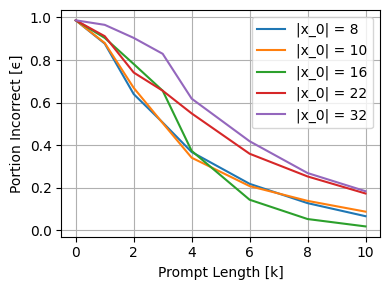

In [15]:
# K-epsilon plot across all questions
res = k_epsilon_line_plot(ranked_shallow1_df, 
                    # title='[Falcon-7b] k-ϵ Plot for Top 75 y* on 25 x_0 from Wikitext', 
                    output_path='figures/shallow1_falcon7b_k_epsilon.pdf', 
                    figsize=FIG_SIZE, 
                    log_y=False)

Now we will plot the base rank of each $y^*$ in the top 75 versus the number of prompt tokens $k$ required to achieve success. 

Note that we want to place the unsolved instances above 10 -- maybe at 12, then 
rename the y-axis tick at 12 to be `[Unsolved]` or something. 

Unsolved prompt lengths (10):  [10]
Unsolved prompt lengths (12):  [12]
Pearson correlation coefficient: 0.26683591917596494
Saving figure...
Done


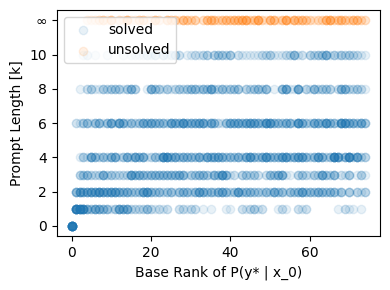

In [16]:
title = '[Falcon-7b] Base Rank vs. Prompt Length for Top 75 y*'
output_path = 'figures/shallow1_falcon7b_base_rank_vs_prompt_length.pdf'
base_rank_k_scatter(ranked_shallow1_df, 
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE)

Pearson correlation coefficient: 0.422273917694776
Saving figure...


Done


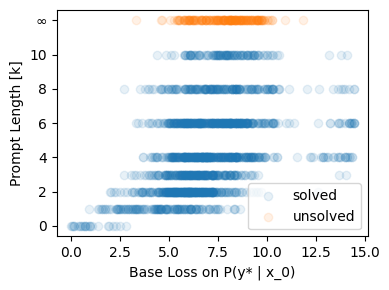

In [17]:
# Let's take a look at base loss vs. prompt length 
title = '[Falcon-7b] Base Loss vs. Prompt Length for Top 75 y*'
output_path = 'figures/shallow1_falcon7b_base_loss_vs_prompt_length.pdf'
base_loss_vs_prompt_len(ranked_shallow1_df, 
                        # title=title, 
                        output_path=output_path, 
                        figsize=FIG_SIZE)


Pearson correlation coefficient: 0.5541080753085746
Saving figure...
Done


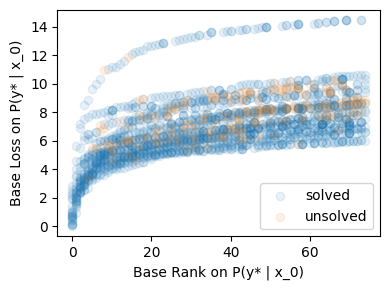

In [18]:
title = '[Falcon-7b] Base Rank vs. Base Loss for Top 75 y*'
output_path = 'figures/shallow1_falcon7b_base_rank_vs_base_loss.pdf'
base_rank_vs_base_loss(ranked_shallow1_df, 
                    #    title=title, 
                       output_path=output_path, 
                       figsize=FIG_SIZE)

/tmp/ipykernel_11109/1174423890.py:40: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig(output_path, dpi=300)
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig(output_path, dpi=300)
/home/paperspace/Magic_Words/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


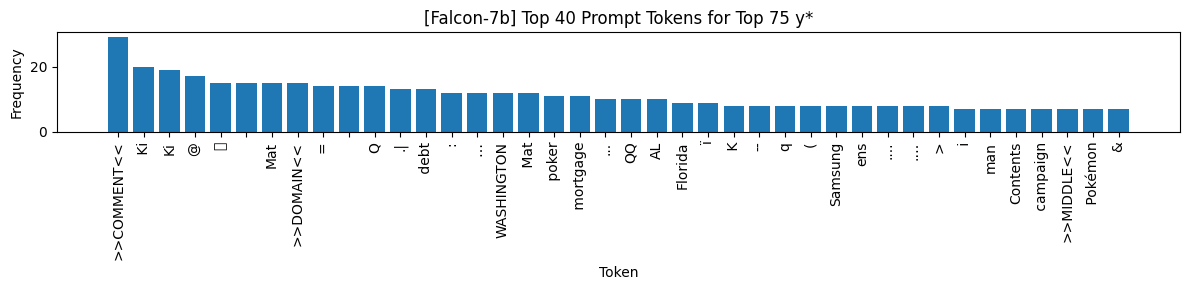

In [19]:
prompt_token_freqs = get_prompt_token_freqs(ranked_shallow1_df, 
                                            falcon_tokenizer, 
                                            num_to_prompt=40, 
                                            title='[Falcon-7b] Top 40 Prompt Tokens for Top 75 y*',
                                            output_path='figures/shallow1_falcon7b_prompt_token_freqs.pdf')

## 3: Llama-7b Top-75 Experiments

### 3.1: Load the Llama-7b Data

In [20]:
file_path = f'shallow_dive/llama-7b/shallow1_*_of_16.csv' 
file_list = glob.glob(file_path)
print(file_list)
df_list = []
for file in file_list:
    df_list.append(pd.read_csv(file, lineterminator='\n'))
shallow_df = pd.concat(df_list)

print("Length of df: ", len(shallow_df))
# shallow_df.head()

['shallow_dive/llama-7b/shallow1_8_of_16.csv', 'shallow_dive/llama-7b/shallow1_10_of_16.csv', 'shallow_dive/llama-7b/shallow1_13_of_16.csv', 'shallow_dive/llama-7b/shallow1_0_of_16.csv', 'shallow_dive/llama-7b/shallow1_15_of_16.csv', 'shallow_dive/llama-7b/shallow1_1_of_16.csv', 'shallow_dive/llama-7b/shallow1_14_of_16.csv', 'shallow_dive/llama-7b/shallow1_9_of_16.csv', 'shallow_dive/llama-7b/shallow1_3_of_16.csv', 'shallow_dive/llama-7b/shallow1_11_of_16.csv', 'shallow_dive/llama-7b/shallow1_6_of_16.csv', 'shallow_dive/llama-7b/shallow1_5_of_16.csv', 'shallow_dive/llama-7b/shallow1_4_of_16.csv', 'shallow_dive/llama-7b/shallow1_12_of_16.csv', 'shallow_dive/llama-7b/shallow1_2_of_16.csv', 'shallow_dive/llama-7b/shallow1_7_of_16.csv']
Length of df:  1875


In [21]:
# Save the dataframe to a csv file 
output_path = 'shallow_dive/llama-7b/shallow1.csv'
# check if it exists
if os.path.exists(output_path):
    print("File already exists")
else:
    print(f"Saving dive1 to {output_path}")
    shallow_df.to_csv(output_path, index=False, lineterminator='\n')
    

File already exists


In [22]:
# overview
overview_report(shallow_df)

Length of dataframe:  1875
Mean prompt correct (epsilon): 	 0.8549333333333333
Mean prompt correct with k <= 4:  0.56
Mean base correct: 		 0.013333333333333334
Mean prompt length: 		 5.058133333333333


Let's now create a version of the `dive1.csv` dataset with the logits and 
rankings: 
```bash
>>> python3 scripts/add_logits.py \
    --input_file results/shallow_dive/llama-7b/shallow1.csv \
    --output_file results/shallow_dive/llama-7b/ranked_shallow1.csv \
    --model llama-7b
```

Now we can load in the ranked csv from `falcon-7b/ranked_shallow1.csv`

In [23]:
# Load in the ranked shallow df 
try: 
    ranked_shallow1_df = pd.read_csv('shallow_dive/llama-7b/ranked_shallow1.csv', lineterminator='\n')
except:
    # throw error that the file does not exist
    print("File `shallow_dive/llama-7b/ranked_shallow1.csv` does not exist. Please run `add_logits.py` script.")
overview_report(ranked_shallow1_df)

Length of dataframe:  1875
Mean prompt correct (epsilon): 	 0.8549333333333333
Mean prompt correct with k <= 4:  0.56
Mean base correct: 		 0.013333333333333334
Mean prompt length: 		 5.058133333333333


### 3.2: Llama-7b Plots

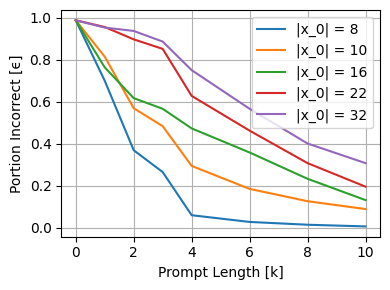

In [24]:
# let's start with a k-epsilon line plot 
title = '[Llama-7b] k-ϵ Plot for Top 75 y* on 25 x_0 from Wikitext'
output_path = 'figures/shallow1_llama7b_k_epsilon.pdf'
res = k_epsilon_line_plot(shallow_df, 
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE, 
                    log_y=False)

Unsolved prompt lengths (10):  [10]
Unsolved prompt lengths (12):  [12]
Pearson correlation coefficient: 0.18746722999273105
Saving figure...
Done


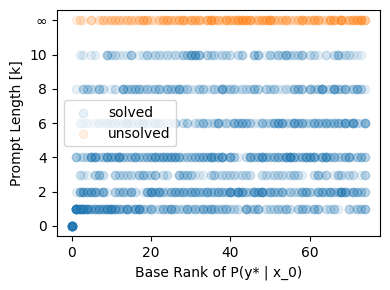

In [25]:
# base rank vs. prompt length 
title = '[Llama-7b] Base Rank vs. Prompt Length for Top 75 y*'
output_path = 'figures/shallow1_llama7b_base_rank_vs_prompt_length.pdf'
base_rank_k_scatter(ranked_shallow1_df, 
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE)

Pearson correlation coefficient: 0.5141300822947106
Saving figure...


Done


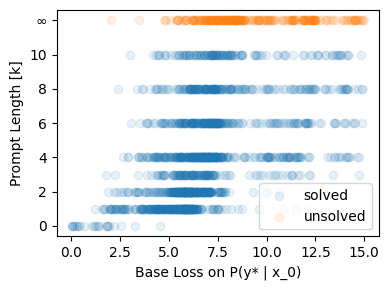

In [26]:
# Base loss vs. prompt length for llama-7b
title = '[Llama-7b] Base Loss vs. Prompt Length for Top 75 y*'
output_path = 'figures/shallow1_llama7b_base_loss_vs_prompt_length.pdf'
base_loss_vs_prompt_len(ranked_shallow1_df, 
                        # title=title, 
                        output_path=output_path, 
                        figsize=FIG_SIZE)


Pearson correlation coefficient: 0.47619729209989675
Saving figure...


Done


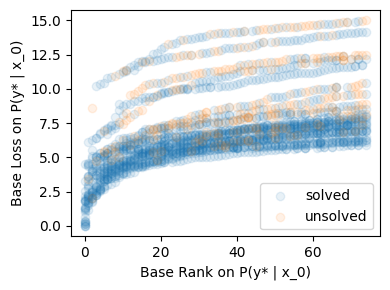

In [27]:
# Base rank vs. base loss for llama-7b
title = '[Llama-7b] Base Rank vs. Base Loss for Top 75 y*'
output_path = 'figures/shallow1_llama7b_base_rank_vs_base_loss.pdf'
base_rank_vs_base_loss(ranked_shallow1_df, 
                    #    title=title, 
                       output_path=output_path, 
                       figsize=FIG_SIZE)


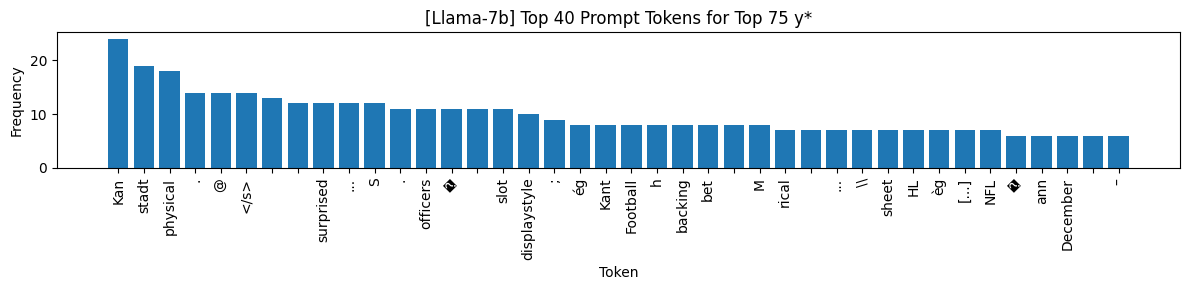

In [28]:
prompt_token_freqs = get_prompt_token_freqs(ranked_shallow1_df, 
                                            llama_tokenizer, 
                                            num_to_prompt=40, 
                                            title='[Llama-7b] Top 40 Prompt Tokens for Top 75 y*',
                                            output_path='figures/shallow1_llama7b_prompt_token_freqs.pdf')

## 4: Falcon-40b Top-75 Experiments

### 4.1: Load the Top-75 Falcon-40b Data

In [29]:
file_path = f'shallow_dive/falcon-40b/shallow1_*_of_*.csv'
file_list = glob.glob(file_path)
print(file_list)
df_list = []
for file in file_list:
    df_list.append(pd.read_csv(file, lineterminator='\n'))
shallow_df = pd.concat(df_list)

# overview 
overview_report(shallow_df)

['shallow_dive/falcon-40b/shallow1_1_of_4.csv', 'shallow_dive/falcon-40b/shallow1_3_of_4.csv', 'shallow_dive/falcon-40b/shallow1_0_of_4.csv', 'shallow_dive/falcon-40b/shallow1_6_of_16.csv', 'shallow_dive/falcon-40b/shallow1_2_of_16.csv']
Length of dataframe:  329
Mean prompt correct (epsilon): 	 0.8571428571428571
Mean prompt correct with k <= 4:  0.5623100303951368
Mean base correct: 		 0.015197568389057751
Mean prompt length: 		 5.036474164133739


In [30]:
# Save the dataframe to a csv file
output_path = 'shallow_dive/falcon-40b/shallow1.csv'
# check if it exists
if os.path.exists(output_path):
    print("File already exists")
else:
    print(f"Saving dive1 to {output_path}")
    shallow_df.to_csv(output_path, index=False, lineterminator='\n')

File already exists


Let's now create a version of the `dive1.csv` dataset with the logits and rankings 
for Falcon-40b: 

```bash
>>> python3 scripts/add_logits.py \
    --input_file results/shallow_dive/falcon-40b/shallow1.csv \
    --output_file results/shallow_dive/falcon-40b/ranked_shallow1.csv \
    --model falcon-40b
```

In [31]:
# Load in the ranked shallow df
ranked_shallow1_df = pd.read_csv('shallow_dive/falcon-40b/ranked_shallow1.csv', lineterminator='\n')

overview_report(ranked_shallow1_df)

Length of dataframe:  281
Mean prompt correct (epsilon): 	 0.8469750889679716
Mean prompt correct with k <= 4:  0.5658362989323843
Mean base correct: 		 0.014234875444839857
Mean prompt length: 		 5.00355871886121


### 4.2: Falcon-40b Plots

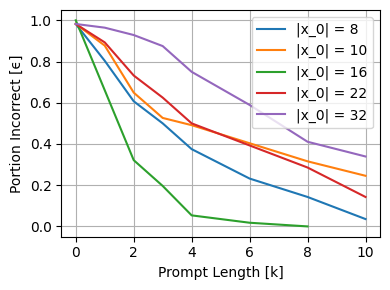

In [32]:
# k-epsilon plot for falcon-40b
title = '[Falcon-40b] k-ϵ Plot for Top 75 y* on 25 x_0 from Wikitext'
output_path = 'figures/shallow1_falcon40b_k_epsilon.pdf'
res = k_epsilon_line_plot(ranked_shallow1_df, 
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE, 
                    log_y=False)

Unsolved prompt lengths (10):  [10]
Unsolved prompt lengths (12):  [12]
Pearson correlation coefficient: 0.3450936790775869
Saving figure...
Done


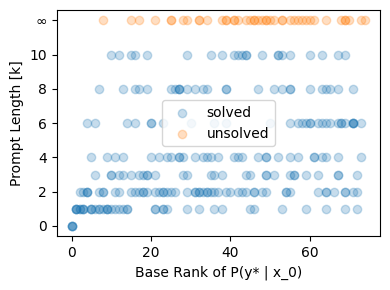

In [33]:
# Base rank vs. prompt length for top 75 
title = '[Falcon-40b] Base Rank vs. Prompt Length for Top 75 y*'
output_path = 'figures/shallow1_falcon40b_base_rank_vs_prompt_length.pdf'
base_rank_k_scatter(ranked_shallow1_df, 
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE, 
                    alpha=0.25)

Pearson correlation coefficient: 0.4188251744062894
Saving figure...
Done


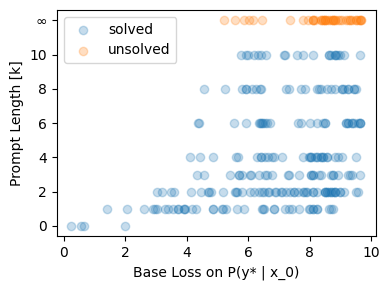

In [34]:
# Base loss vs. prompt length for falcon-40b
title = '[Falcon-40b] Base Loss vs. Prompt Length for Top 75 y*'
output_path = 'figures/shallow1_falcon40b_base_loss_vs_prompt_length.pdf'
base_loss_vs_prompt_len(ranked_shallow1_df, 
                        # title=title, 
                        output_path=output_path, 
                        figsize=FIG_SIZE, 
                        alpha=0.25)

Pearson correlation coefficient: 0.7356748801439814
Saving figure...
Done


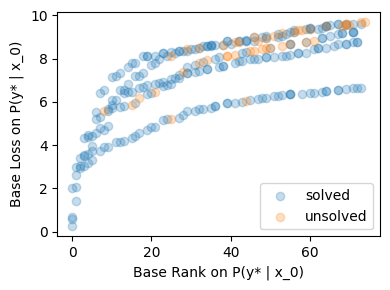

In [35]:
# Base rank vs. base loss for falcon-40b
title = '[Falcon-40b] Base Rank vs. Base Loss for Top 75 y*'
output_path = 'figures/shallow1_falcon40b_base_rank_vs_base_loss.pdf'
base_rank_vs_base_loss(ranked_shallow1_df, 
                    #    title=title, 
                       output_path=output_path, 
                       figsize=FIG_SIZE, 
                       alpha=0.25)

/tmp/ipykernel_11109/1174423890.py:40: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  plt.savefig(output_path, dpi=300)
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  plt.savefig(output_path, dpi=300)
/home/paperspace/Magic_Words/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


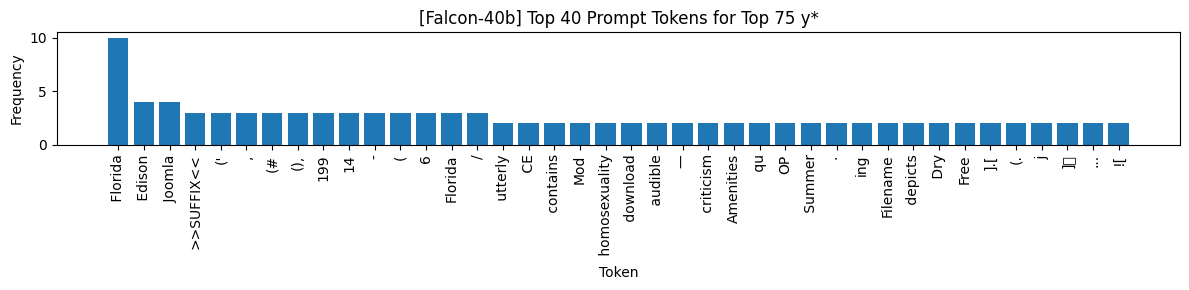

In [36]:
prompt_token_freqs = get_prompt_token_freqs(ranked_shallow1_df, 
                                            falcon_tokenizer, 
                                            num_to_prompt=40, 
                                            title='[Falcon-40b] Top 40 Prompt Tokens for Top 75 y*',
                                            output_path='figures/shallow1_falcon40b_prompt_token_freqs.pdf')

# ORIGINAL WIKITEXT EXPERIMENTS
We still need to re-do the original plots. Plus it will be fun to see the base 
rank statistics for natural wikitext data. It's all just a few commands awway!

The Falcon-7b results dataframe is in `wiki_reachability/k10_falcon7b_wiki5k.csv`

## 5: Falcon-7b Regular Plots

### 5.1: Load the Data

In [37]:
file_path = f'wiki_reachability/k10_falcon7b_wiki5k.csv'
# load the dataframe 
wiki_df = pd.read_csv(file_path, lineterminator='\n')
# overview
overview_report(wiki_df)

Length of dataframe:  5000
Mean prompt correct (epsilon): 	 0.9716
Mean prompt correct with k <= 4:  0.9022
Mean base correct: 		 0.4208
Mean prompt length: 		 2.1828


Let's now create a version of the dataframe that has all the ranks and logits: 

```
>>> python3 scripts/add_logits.py \
    --input_file results/wiki_reachability/k10_falcon7b_wiki5k.csv \
    --output_file results/wiki_reachability/ranked_k10_falcon7b_wiki5k.csv \
    --model falcon-7b
```

In [38]:
# Load the ranked dataframe
ranked_wiki_df = pd.read_csv('wiki_reachability/ranked_k10_falcon7b_wiki5k.csv', lineterminator='\n')
overview_report(ranked_wiki_df)

Length of dataframe:  5000
Mean prompt correct (epsilon): 	 0.9716
Mean prompt correct with k <= 4:  0.9022
Mean base correct: 		 0.4208
Mean prompt length: 		 2.1828


### 5.2: Falcon-7b OG Plots

[(8,
  [(0, 1.0),
   (1, 0.345),
   (2, 0.18799999999999994),
   (3, 0.131),
   (4, 0.05600000000000005),
   (6, 0.029000000000000026),
   (8, 0.014000000000000012),
   (10, 0.010000000000000009)]),
 (10,
  [(0, 1.0),
   (1, 0.355),
   (2, 0.19699999999999995),
   (3, 0.14100000000000001),
   (4, 0.06799999999999995),
   (6, 0.039000000000000035),
   (8, 0.026000000000000023),
   (10, 0.02300000000000002)]),
 (16,
  [(0, 1.0),
   (1, 0.389),
   (2, 0.235),
   (3, 0.18200000000000005),
   (4, 0.09499999999999997),
   (6, 0.05300000000000005),
   (8, 0.03400000000000003),
   (10, 0.02300000000000002)]),
 (22,
  [(0, 1.0),
   (1, 0.42100000000000004),
   (2, 0.279),
   (3, 0.20399999999999996),
   (4, 0.12),
   (6, 0.07399999999999995),
   (8, 0.05400000000000005),
   (10, 0.041000000000000036)]),
 (32,
  [(0, 1.0),
   (1, 0.405),
   (2, 0.29000000000000004),
   (3, 0.23399999999999999),
   (4, 0.15000000000000002),
   (6, 0.08699999999999997),
   (8, 0.06000000000000005),
   (10, 0.04500

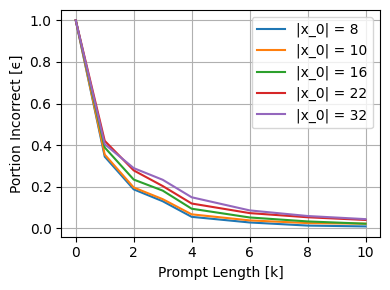

In [39]:
# K-epsilon plot across all questions
res = k_epsilon_line_plot(ranked_wiki_df, 
                    # title='[Falcon-7b] k-ϵ Plot for (x_0, y*) from Wikitext', 
                    output_path='figures/og_falcon7b_k_epsilon.pdf', 
                    figsize=FIG_SIZE, 
                    log_y=False)

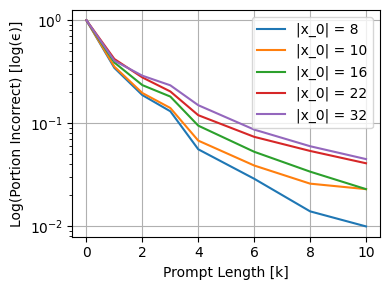

In [40]:
# Let's do a k-epsilon plot with log axes
res = k_epsilon_line_plot(ranked_wiki_df, 
                    # title='[Falcon-7b] k-ϵ Plot for (x_0, y*) from Wikitext', 
                    output_path='figures/og_falcon7b_log_k_epsilon.pdf', 
                    figsize=FIG_SIZE, 
                    log_y=True)

Unsolved prompt lengths (10):  [10]
Unsolved prompt lengths (12):  [12]
Pearson correlation coefficient: 0.12265869632455796
Saving figure...
Done


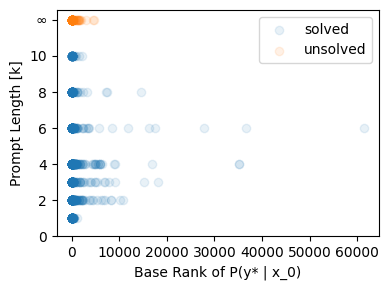

In [41]:
# Base rank vs. number of prompt tokens 
title = '[Falcon-7b] Base Rank vs. Prompt Length for (x_0, y*) from Wikitext'
output_path = 'figures/og_falcon7b_base_rank_vs_prompt_length.pdf'

restricted = False
num_restricted = 75

# try filtering for base rank < 1000
# ranked_wiki_df_1000 = ranked_wiki_df[ranked_wiki_df['base_rank'] < 75]
# ranked_wiki_df_1000 = ranked_wiki_df

if restricted:
    ranked_wiki_df_1000 = ranked_wiki_df[ranked_wiki_df['base_rank'] < num_restricted]
    title = f'[Falcon-7b] Base Rank vs. Prompt Length for Top {num_restricted} Ranked (x_0, y*) from Wikitext'
else:
    title = '[Falcon-7b] Base Rank vs. Prompt Length for (x_0, y*) from Wikitext'
    ranked_wiki_df_1000 = ranked_wiki_df

base_rank_k_scatter(ranked_wiki_df_1000, 
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE)

Pearson correlation coefficient: 0.5916340607095026
Saving figure...


Done


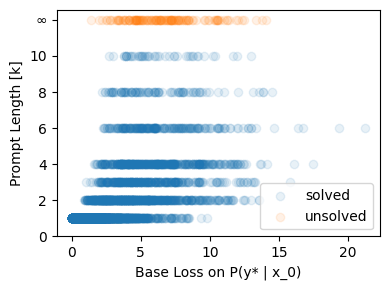

In [42]:
# Let's take a look at base loss vs. prompt length 
title = '[Falcon-7b] Base Loss vs. Prompt Length for (x_0, y*) from Wikitext'
output_path = 'figures/og_falcon7b_base_loss_vs_prompt_length.pdf'
base_loss_vs_prompt_len(ranked_wiki_df, 
                        # title=title, 
                        output_path=output_path, 
                        figsize=FIG_SIZE)

Number of retained instances:  4418  of  5000
Pearson correlation coefficient: 0.763079177706263
Saving figure...


Done


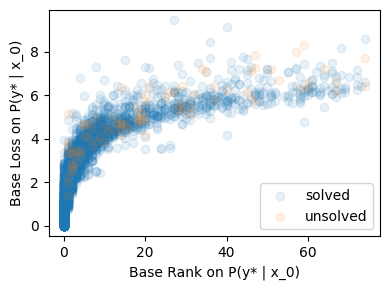

In [43]:
# just for fun: base rank vs. base loss
restricted = True
num_restricted = 75
output_path = 'figures/og_falcon7b_base_rank_vs_base_loss.pdf'

if restricted: 
    ranked_wiki_df_short = ranked_wiki_df[ranked_wiki_df['base_rank'] < num_restricted]
    print("Number of retained instances: ", len(ranked_wiki_df_short), " of ", len(ranked_wiki_df))
    title = f'[Falcon-7b] Base Rank vs. Base Loss for (x_0, y*) from Wikitext; Base Rank > {num_restricted}'
else:
    title = f'[Falcon-7b] Base Rank vs. Base Loss for (x_0, y*) from Wikitext'
    ranked_wiki_df_short = ranked_wiki_df

base_rank_vs_base_loss(ranked_wiki_df_short, 
                    #    title=title, 
                       output_path=output_path, 
                       figsize=FIG_SIZE)

/tmp/ipykernel_11109/1174423890.py:40: UserWarning: Glyph 0 ( ) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_11109/1174423890.py:40: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 0 ( ) missing from current font.
  plt.savefig(output_path, dpi=300)
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig(output_path, dpi=300)
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 0 ( ) missing from current font.
  plt.savefig(output_path, dpi=300)
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig(output_path, dpi=300)
/home/paperspace/Magic_Words/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 0 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/paperspace/Magic_Words/venv/lib/python3.9/site-packages/IPython/core/pylab

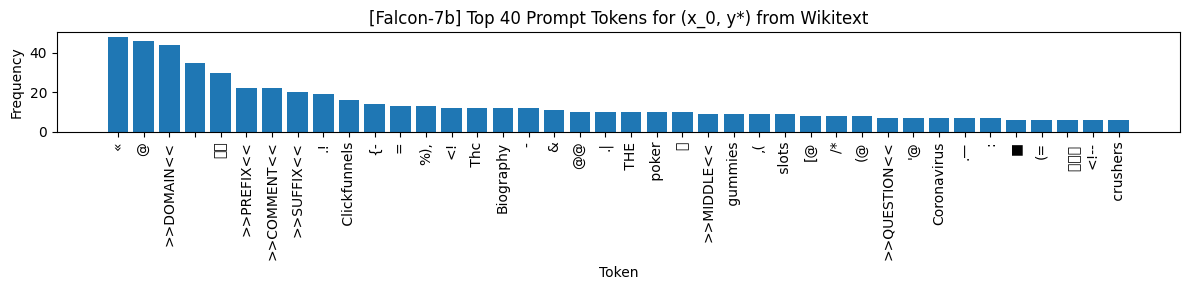

In [44]:
prompt_token_freqs = get_prompt_token_freqs(ranked_wiki_df, 
                                            falcon_tokenizer, 
                                            num_to_prompt=40, 
                                            title='[Falcon-7b] Top 40 Prompt Tokens for (x_0, y*) from Wikitext',
                                            output_path='figures/og_falcon7b_prompt_token_freqs.pdf')

## 6: Llama-7b Regular Plots

### 6.1: Load the Data

In [45]:
file_path = f'wiki_reachability/k10_llama_7b_wiki5k.csv'
# load the dataframe
wiki_df = pd.read_csv(file_path, lineterminator='\n')
# overview
overview_report(wiki_df)


Length of dataframe:  5000
Mean prompt correct (epsilon): 	 0.9864
Mean prompt correct with k <= 4:  0.9088
Mean base correct: 		 0.4034
Mean prompt length: 		 1.8322


Let's create a version of the dataframe with the ranks and logits: 

```
>>> python3 scripts/add_logits.py \
    --input_file results/wiki_reachability/k10_llama_7b_wiki5k.csv \
    --output_file results/wiki_reachability/ranked_k10_llama_7b_wiki5k.csv \
    --model llama-7b
```

In [46]:
# Load the ranked llama-7b dataframe
ranked_wiki_df = pd.read_csv('wiki_reachability/ranked_k10_llama_7b_wiki5k.csv', lineterminator='\n')
overview_report(ranked_wiki_df)

Length of dataframe:  5000
Mean prompt correct (epsilon): 	 0.9864
Mean prompt correct with k <= 4:  0.9088
Mean base correct: 		 0.4034
Mean prompt length: 		 1.8322


### 6.2: Llama-7b OG Plots

[(8,
  [(0, 0.6679999999999999),
   (0, 0.6679999999999999),
   (1, 0.388),
   (2, 0.23299999999999998),
   (3, 0.19999999999999996),
   (4, 0.049000000000000044),
   (6, 0.02200000000000002),
   (8, 0.010000000000000009),
   (10, 0.0040000000000000036)]),
 (10,
  [(0, 0.6579999999999999),
   (0, 0.6579999999999999),
   (1, 0.4),
   (2, 0.278),
   (3, 0.23399999999999999),
   (4, 0.09399999999999997),
   (6, 0.049000000000000044),
   (8, 0.028000000000000025),
   (10, 0.014000000000000012)]),
 (16,
  [(0, 0.5900000000000001),
   (0, 0.5900000000000001),
   (1, 0.40800000000000003),
   (2, 0.29500000000000004),
   (3, 0.253),
   (4, 0.10199999999999998),
   (6, 0.05400000000000005),
   (8, 0.027000000000000024),
   (10, 0.01100000000000001)]),
 (22,
  [(0, 0.5489999999999999),
   (0, 0.5489999999999999),
   (1, 0.367),
   (2, 0.28500000000000003),
   (3, 0.248),
   (4, 0.10499999999999998),
   (6, 0.05800000000000005),
   (8, 0.03300000000000003),
   (10, 0.015000000000000013)]),
 (32,


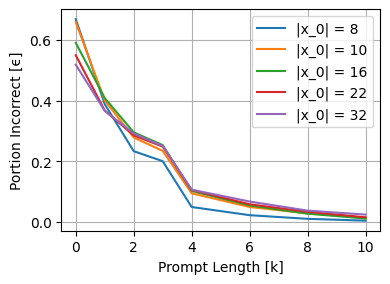

In [47]:
# classic k-epsilon plot
k_epsilon_line_plot(ranked_wiki_df, 
                    # title='[Llama-7b] k-ϵ Plot for (x_0, y*) from Wikitext', 
                    output_path='figures/og_llama7b_k_epsilon.pdf', 
                    figsize=FIG_SIZE, 
                    log_y=False)

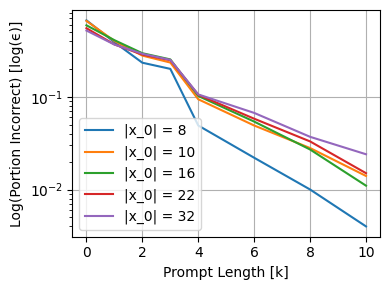

In [48]:
# k-epsilon plot with log axes
res = k_epsilon_line_plot(ranked_wiki_df, 
                    # title='[Llama-7b] k-ϵ Plot for (x_0, y*) from Wikitext', 
                    output_path='figures/og_llama7b_log_k_epsilon.pdf', 
                    figsize=FIG_SIZE, 
                    log_y=True)

Unsolved prompt lengths (10):  [10]
Unsolved prompt lengths (12):  [12]
Pearson correlation coefficient: 0.20707026658248054
Saving figure...
Done


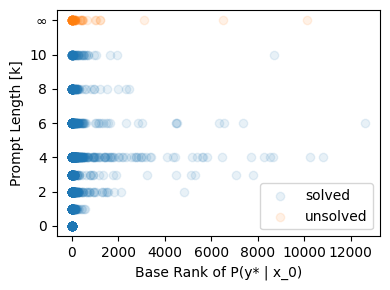

In [49]:
# base rank vs. num tokens 
title = '[Llama-7b] Base Rank vs. Prompt Length for (x_0, y*) from Wikitext'
output_path = 'figures/og_llama7b_base_rank_vs_prompt_length.pdf'

restricted = False
num_restricted = 75

# try filtering for base rank < 1000
# ranked_wiki_df_1000 = ranked_wiki_df[ranked_wiki_df['base_rank'] < 75]
# ranked_wiki_df_1000 = ranked_wiki_df

if restricted:
    ranked_wiki_df_1000 = ranked_wiki_df[ranked_wiki_df['base_rank'] < num_restricted]
    title = f'[Llama-7b] Base Rank vs. Prompt Length for Top {num_restricted} Ranked (x_0, y*) from Wikitext'
else:
    title = '[Llama-7b] Base Rank vs. Prompt Length for (x_0, y*) from Wikitext'
    ranked_wiki_df_1000 = ranked_wiki_df

base_rank_k_scatter(ranked_wiki_df_1000,
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE)


Pearson correlation coefficient: 0.6966704340734993


Saving figure...
Done


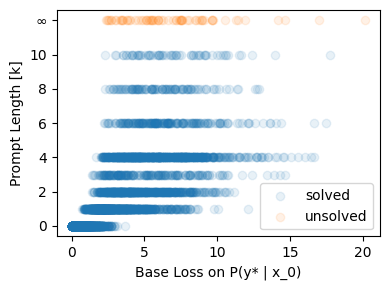

In [50]:
# Let's take a look at base loss vs. prompt length
title = '[Llama-7b] Base Loss vs. Prompt Length for (x_0, y*) from Wikitext'
output_path = 'figures/og_llama7b_base_loss_vs_prompt_length.pdf'
base_loss_vs_prompt_len(ranked_wiki_df, 
                        # title=title, 
                        output_path=output_path, 
                        figsize=FIG_SIZE)

Number of retained instances:  4372  of  5000
Pearson correlation coefficient: 0.7577764729482043
Saving figure...


Done


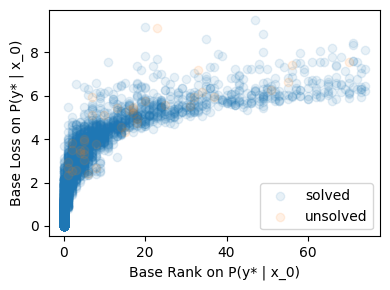

In [51]:
# Just for fun: base rank vs. base loss
restricted = True
num_restricted = 75
output_path = 'figures/og_llama7b_base_rank_vs_base_loss.pdf'

if restricted:
    ranked_wiki_df_short = ranked_wiki_df[ranked_wiki_df['base_rank'] < num_restricted]
    print("Number of retained instances: ", len(ranked_wiki_df_short), " of ", len(ranked_wiki_df))
    title = f'[Llama-7b] Base Rank vs. Base Loss for (x_0, y*) from Wikitext; Base Rank > {num_restricted}'
else:
    title = f'[Llama-7b] Base Rank vs. Base Loss for (x_0, y*) from Wikitext'
    ranked_wiki_df_short = ranked_wiki_df

base_rank_vs_base_loss(ranked_wiki_df_short,
                        #   title=title, 
                          output_path=output_path, 
                          figsize=FIG_SIZE)

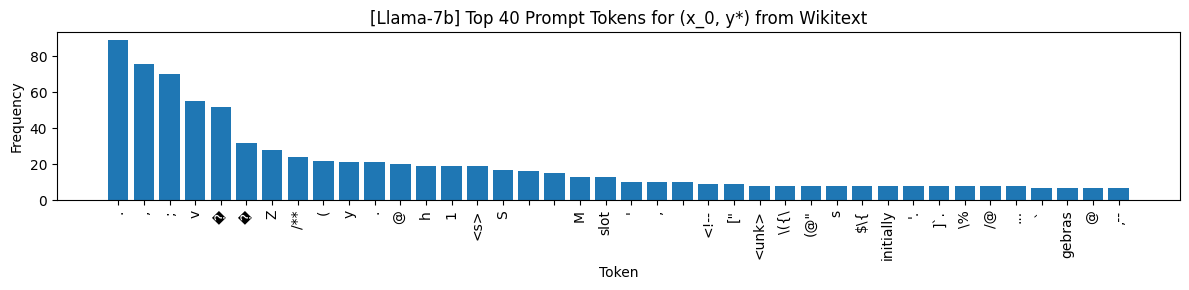

In [52]:
prompt_token_freqs = get_prompt_token_freqs(ranked_wiki_df, 
                                            llama_tokenizer, 
                                            num_to_prompt=40, 
                                            title='[Llama-7b] Top 40 Prompt Tokens for (x_0, y*) from Wikitext',
                                            output_path='figures/og_llama7b_prompt_token_freqs.pdf')

## 7: Falcon-40b OG Experiments

### 7.1 Load the Data

In [53]:
file_path= f'wiki_reachability/k10_falcon_40b_wiki5k.csv'
# load the dataframe
wiki_df = pd.read_csv(file_path, lineterminator='\n')
# overview
overview_report(wiki_df)

Length of dataframe:  500
Mean prompt correct (epsilon): 	 0.97
Mean prompt correct with k <= 4:  0.904
Mean base correct: 		 0.438
Mean prompt length: 		 1.588


Let's now create a version of the dataframe that has all the ranks and logits: 
```bash
>>> python3 scripts/add_logits.py \
    --input_file results/wiki_reachability/k10_falcon_40b_wiki5k.csv \
    --output_file results/wiki_reachability/ranked_k10_falcon_40b_wiki5k.csv \
    --model falcon-40b
```

In [54]:
# Load the ranked falcon-40b dataframe
ranked_wiki_df = pd.read_csv('wiki_reachability/ranked_k10_falcon_40b_wiki5k.csv', lineterminator='\n')
overview_report(ranked_wiki_df)

Length of dataframe:  500
Mean prompt correct (epsilon): 	 0.97
Mean prompt correct with k <= 4:  0.904
Mean base correct: 		 0.438
Mean prompt length: 		 1.588


### 7.2 Falcon-40b OG Plots

[(8,
  [(0, 0.62),
   (0, 0.62),
   (1, 0.32999999999999996),
   (2, 0.13),
   (3, 0.07999999999999996),
   (4, 0.050000000000000044),
   (6, 0.040000000000000036),
   (8, 0.020000000000000018),
   (10, 0.010000000000000009)]),
 (10,
  [(0, 0.54),
   (0, 0.54),
   (1, 0.26),
   (2, 0.12),
   (3, 0.09999999999999998),
   (4, 0.040000000000000036),
   (6, 0.010000000000000009),
   (8, 0.0)]),
 (16,
  [(0, 0.5643564356435644),
   (0, 0.5643564356435644),
   (1, 0.3168316831683168),
   (2, 0.19801980198019797),
   (3, 0.12871287128712872),
   (4, 0.1089108910891089),
   (6, 0.07920792079207917),
   (8, 0.05940594059405946),
   (10, 0.02970297029702973)]),
 (22,
  [(0, 0.5510204081632653),
   (0, 0.5510204081632653),
   (1, 0.2857142857142857),
   (2, 0.23469387755102045),
   (3, 0.19387755102040816),
   (4, 0.1428571428571429),
   (6, 0.09183673469387754),
   (8, 0.0714285714285714),
   (10, 0.05102040816326525)]),
 (32,
  [(0, 0.5346534653465347),
   (0, 0.5346534653465347),
   (1, 0.3465

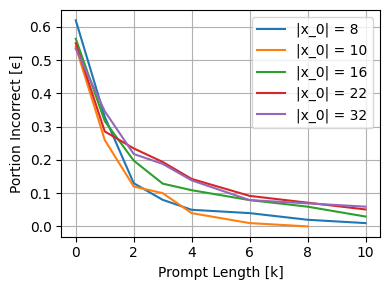

In [55]:
# classic k-epsilon plot
k_epsilon_line_plot(ranked_wiki_df, 
                    # title='[Falcon-40b] k-ϵ Plot for (x_0, y*) from Wikitext', 
                    output_path='figures/og_falcon40b_k_epsilon.pdf', 
                    figsize=FIG_SIZE, 
                    log_y=False)

[(8,
  [(0, 0.62),
   (0, 0.62),
   (1, 0.32999999999999996),
   (2, 0.13),
   (3, 0.07999999999999996),
   (4, 0.050000000000000044),
   (6, 0.040000000000000036),
   (8, 0.020000000000000018),
   (10, 0.010000000000000009)]),
 (10,
  [(0, 0.54),
   (0, 0.54),
   (1, 0.26),
   (2, 0.12),
   (3, 0.09999999999999998),
   (4, 0.040000000000000036),
   (6, 0.010000000000000009),
   (8, 0.0)]),
 (16,
  [(0, 0.5643564356435644),
   (0, 0.5643564356435644),
   (1, 0.3168316831683168),
   (2, 0.19801980198019797),
   (3, 0.12871287128712872),
   (4, 0.1089108910891089),
   (6, 0.07920792079207917),
   (8, 0.05940594059405946),
   (10, 0.02970297029702973)]),
 (22,
  [(0, 0.5510204081632653),
   (0, 0.5510204081632653),
   (1, 0.2857142857142857),
   (2, 0.23469387755102045),
   (3, 0.19387755102040816),
   (4, 0.1428571428571429),
   (6, 0.09183673469387754),
   (8, 0.0714285714285714),
   (10, 0.05102040816326525)]),
 (32,
  [(0, 0.5346534653465347),
   (0, 0.5346534653465347),
   (1, 0.3465

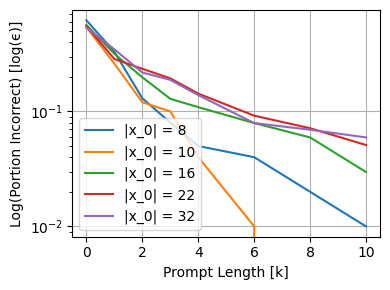

In [56]:
# k-epsilon plot with log axes
k_epsilon_line_plot(ranked_wiki_df, 
                    # title='[Falcon-40b] k-ϵ Plot for (x_0, y*) from Wikitext', 
                    output_path='figures/og_falcon40b_log_k_epsilon.pdf', 
                    figsize=FIG_SIZE, 
                    log_y=True)

Unsolved prompt lengths (10):  [10]
Unsolved prompt lengths (12):  [12]
Pearson correlation coefficient: 0.1736590425245098
Saving figure...
Done


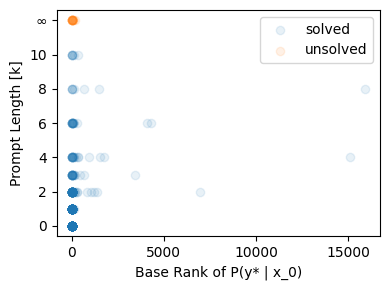

In [57]:
# base rank vs. num tokens 
title = '[Falcon-40b] Base Rank vs. Prompt Length for (x_0, y*) from Wikitext'
output_path = 'figures/og_falcon40b_base_rank_vs_prompt_length.pdf'

restricted = False
num_restricted = 75

# try filtering for base rank < 1000
# ranked_wiki_df_1000 = ranked_wiki_df[ranked_wiki_df['base_rank'] < 75]
# ranked_wiki_df_1000 = ranked_wiki_df

if restricted:
    ranked_wiki_df_1000 = ranked_wiki_df[ranked_wiki_df['base_rank'] < num_restricted]
    title = f'[Falcon-40b] Base Rank vs. Prompt Length for Top {num_restricted} Ranked (x_0, y*) from Wikitext'
else:
    title = '[Falcon-40b] Base Rank vs. Prompt Length for (x_0, y*) from Wikitext'
    ranked_wiki_df_1000 = ranked_wiki_df

base_rank_k_scatter(ranked_wiki_df_1000,
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE)


Pearson correlation coefficient: 0.6407229055570773
Saving figure...
Done


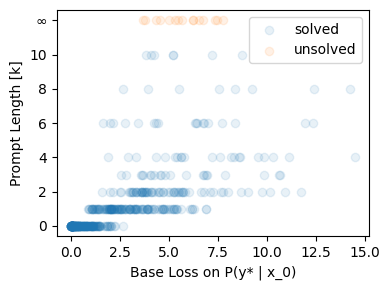

In [58]:
# Let's take a look at base loss vs. prompt length
title = '[Falcon-40b] Base Loss vs. Prompt Length for (x_0, y*) from Wikitext'
output_path = 'figures/og_falcon40b_base_loss_vs_prompt_length.pdf'
base_loss_vs_prompt_len(ranked_wiki_df, 
                        # title=title, 
                        output_path=output_path, 
                        figsize=FIG_SIZE)

Number of retained instances:  455  of  500
Pearson correlation coefficient: 0.7675441826086953
Saving figure...
Done


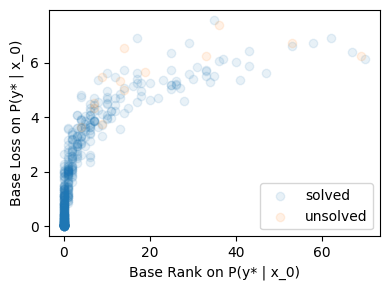

In [59]:
# Just for fun: base rank vs. base loss
restricted = True
num_restricted = 75
output_path = 'figures/og_falcon40b_base_rank_vs_base_loss.pdf'

if restricted:
    ranked_wiki_df_short = ranked_wiki_df[ranked_wiki_df['base_rank'] < num_restricted]
    print("Number of retained instances: ", len(ranked_wiki_df_short), " of ", len(ranked_wiki_df))
    title = f'[Falcon-40b] Base Rank vs. Base Loss for (x_0, y*) from Wikitext; Base Rank > {num_restricted}'
else:
    title = f'[Falcon-40b] Base Rank vs. Base Loss for (x_0, y*) from Wikitext'
    ranked_wiki_df_short = ranked_wiki_df

base_rank_vs_base_loss(ranked_wiki_df_short,
                        #   title=title, 
                          output_path=output_path, 
                          figsize=FIG_SIZE)

/tmp/ipykernel_11109/1174423890.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


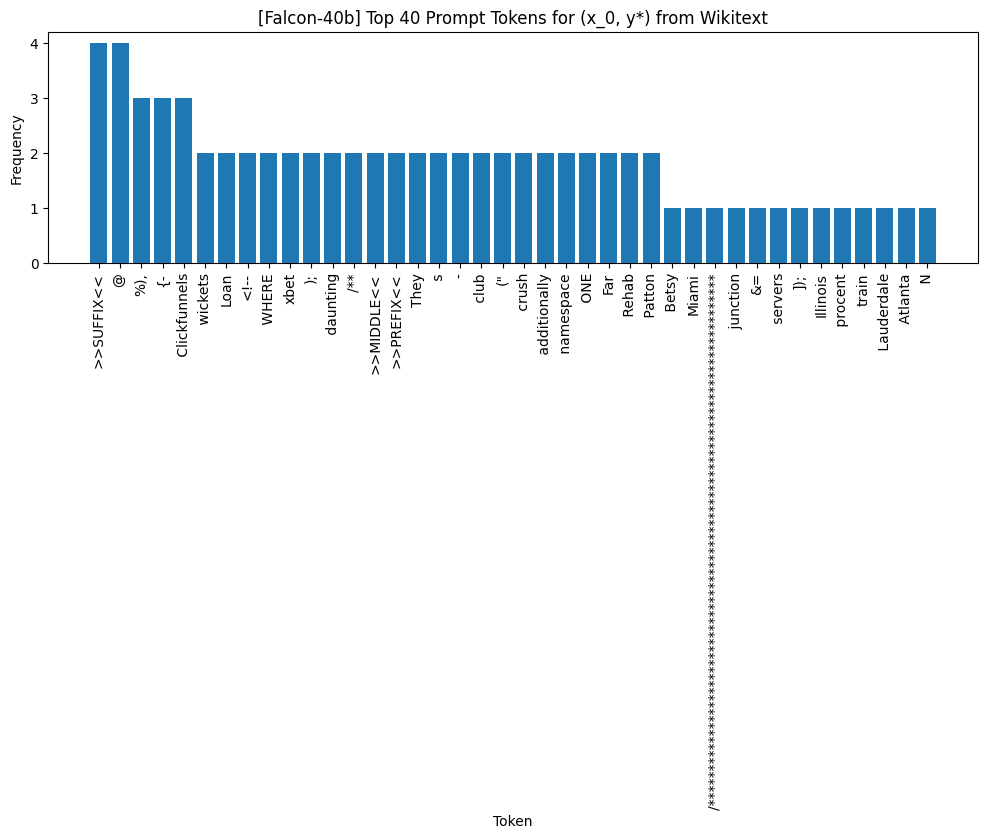

In [60]:
prompt_token_freqs = get_prompt_token_freqs(ranked_wiki_df, 
                                            falcon_tokenizer, 
                                            num_to_prompt=40, 
                                            title='[Falcon-40b] Top 40 Prompt Tokens for (x_0, y*) from Wikitext',
                                            output_path='figures/og_falcon40b_prompt_token_freqs.pdf')

## 7.5: GPT-2 OG Experiments

Results csv in `wiki_reachability/k10_gpt2_wiki5k.csv`

In [13]:
file_path = f'wiki_reachability/k10_gpt2_wiki5k.csv'
# load the dataframe 
wiki_df = pd.read_csv(file_path, lineterminator='\n')
# overview
overview_report(wiki_df)

Length of dataframe:  5000
Mean prompt correct (epsilon): 	 0.9968
Mean prompt correct with k <= 4:  0.877
Mean base correct: 		 0.2468
Mean prompt length: 		 2.6598


Let's now create a version of the dataframe that has all the ranks and logits: 

```
python3 scripts/add_logits.py \
    --input_file results/wiki_reachability/k10_gpt2_wiki5k.csv \
    --output_file results/wiki_reachability/ranked_k10_gpt2_wiki5k.csv \
    --model gpt-2-small
```

In [ ]:
# Load the ranked dataframe
ranked_wiki_df = pd.read_csv('wiki_reachability/ranked_k10_gpt2_wiki5k.csv', lineterminator='\n')
overview_report(ranked_wiki_df)

In [ ]:
# k-epsilon plots for gpt-2
res = k_epsilon_line_plot(ranked_wiki_df, 
                    # title='[Falcon-7b] k-ϵ Plot for (x_0, y*) from Wikitext', 
                    output_path='figures/og_gpt2_k_epsilon.pdf', 
                    figsize=FIG_SIZE, 
                    log_y=False)

# DEEP DIVE EXPERIMENTS

We only had time to do Falcon-7b for the deep-dive experiments -- so let's see what 
we got out of it, using all our nice new plotting functions. 

## 8: Falcon-7b Deep Dive

### 8.1: Load the Data
Data for the deep dive is in `deep_dive/falcon-7b/dive1_*_of_64.csv`

In [61]:
# Load in the data 
file_path = r'deep_dive/falcon-7b/dive1_*_of_64.csv'
file_list = glob.glob(file_path)
print(file_list)
df_list = []
for file in file_list:
    df_list.append(pd.read_csv(file, lineterminator='\n'))
deep_df = pd.concat(df_list)

# overview
overview_report(deep_df)

['deep_dive/falcon-7b/dive1_6_of_64.csv', 'deep_dive/falcon-7b/dive1_5_of_64.csv', 'deep_dive/falcon-7b/dive1_2_of_64.csv', 'deep_dive/falcon-7b/dive1_1_of_64.csv', 'deep_dive/falcon-7b/dive1_7_of_64.csv', 'deep_dive/falcon-7b/dive1_4_of_64.csv', 'deep_dive/falcon-7b/dive1_3_of_64.csv', 'deep_dive/falcon-7b/dive1_0_of_64.csv']
Length of dataframe:  616
Mean prompt correct (epsilon): 	 0.4642857142857143
Mean prompt correct with k <= 4:  0.15097402597402598
Mean base correct: 		 0.00487012987012987
Mean prompt length: 		 8.25487012987013


In [62]:
# Save the dataframe to a unified csv file 
output_path = 'deep_dive/falcon-7b/dive1.csv'

# check if it exists
if os.path.exists(output_path):
    print("File already exists")
else:
    print(f"Saving dive1 to {output_path}")
    deep_df.to_csv(output_path, index=False, lineterminator='\n')

File already exists


Let's now create a version of `dive1.csv` with the logits and rankings: 

```bash
python3 scripts/add_logits.py \
    --input_file results/deep_dive/falcon-7b/dive1.csv \
    --output_file results/deep_dive/falcon-7b/ranked_dive1.csv \
    --model falcon-7b
```

In [63]:
ranked_dive1_df = pd.read_csv('deep_dive/falcon-7b/ranked_dive1.csv', lineterminator='\n')
overview_report(ranked_dive1_df)

Length of dataframe:  616
Mean prompt correct (epsilon): 	 0.4642857142857143
Mean prompt correct with k <= 4:  0.15097402597402598
Mean base correct: 		 0.00487012987012987
Mean prompt length: 		 8.25487012987013


### 8.2: Deep Dive Plots (Falcon-7b)

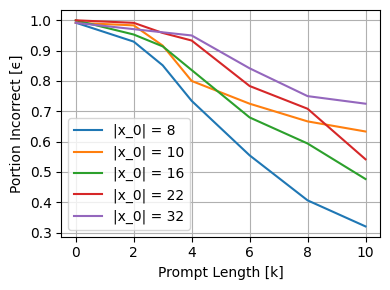

In [64]:
# k-epsilon plot for falcon-7b
title = '[Falcon-7b] k-ϵ Plot for y* ~ uniform(V) on x_0 from Wikitext'
output_path = 'figures/deep1_falcon7b_k_epsilon.pdf'
res = k_epsilon_line_plot(ranked_dive1_df, 
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE, 
                    log_y=False)


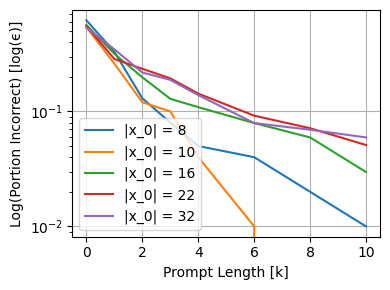

In [65]:
# k-epsilon plot with log axes
res = k_epsilon_line_plot(ranked_wiki_df, 
                    # title='[Falcon-7b] k-ϵ Plot for y* ~ uniform(V) with x_0 ~ Wikitext', 
                    output_path='figures/deep1_falcon7b_log_k_epsilon.pdf', 
                    figsize=FIG_SIZE, 
                    log_y=True)

Unsolved prompt lengths (10):  [10]
Unsolved prompt lengths (12):  [12]
Pearson correlation coefficient: 0.20599976315889434
Saving figure...
Done


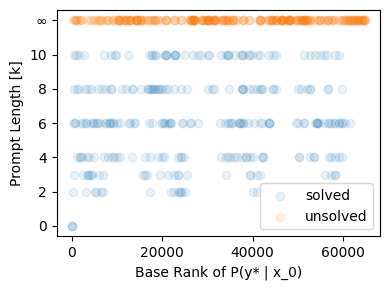

In [66]:
# Base rank vs. prompt length for uniformly sampled y*
title = '[Falcon-7b] Base Rank vs. Prompt Length for y* ~ uniform(V) on x_0 from Wikitext'
output_path = 'figures/deep1_falcon7b_base_rank_vs_prompt_length.pdf'
base_rank_k_scatter(ranked_dive1_df, 
                    # title=title, 
                    output_path=output_path, 
                    figsize=FIG_SIZE)

Pearson correlation coefficient: 0.4901051777054313
Saving figure...
Done


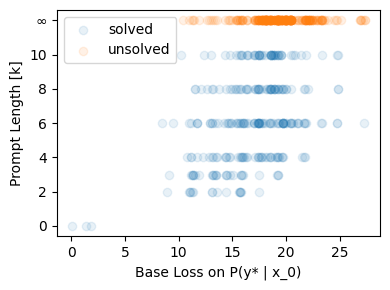

In [67]:
# Base loss vs. prompt length for uniformly sampled y*
title = '[Falcon-7b] Base Loss vs. Prompt Length for y* ~ uniform(V) and x_0 ~ Wikitext'
output_path = 'figures/deep1_falcon7b_base_loss_vs_prompt_length.pdf'
base_loss_vs_prompt_len(ranked_dive1_df, 
                        # title=title, 
                        output_path=output_path, 
                        figsize=FIG_SIZE)

Pearson correlation coefficient: 0.7036270955858512
Saving figure...
Done


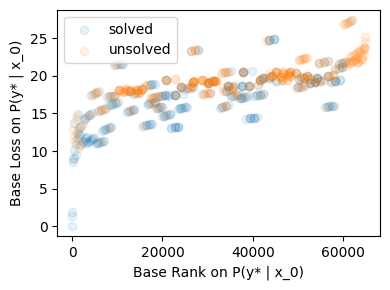

In [68]:
# Base rank vs. base loss for uniformly sampled y*
title = '[Falcon-7b] Base Rank vs. Base Loss for y* ~ uniform(V) on x_0 from Wikitext'

output_path = 'figures/deep1_falcon7b_base_rank_vs_base_loss.pdf'

base_rank_vs_base_loss(ranked_dive1_df,
                        #   title=title, 
                          output_path=output_path, 
                          figsize=FIG_SIZE)


/tmp/ipykernel_11109/1174423890.py:40: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig(output_path, dpi=300)
/tmp/ipykernel_11109/1174423890.py:43: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig(output_path, dpi=300)
/home/paperspace/Magic_Words/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


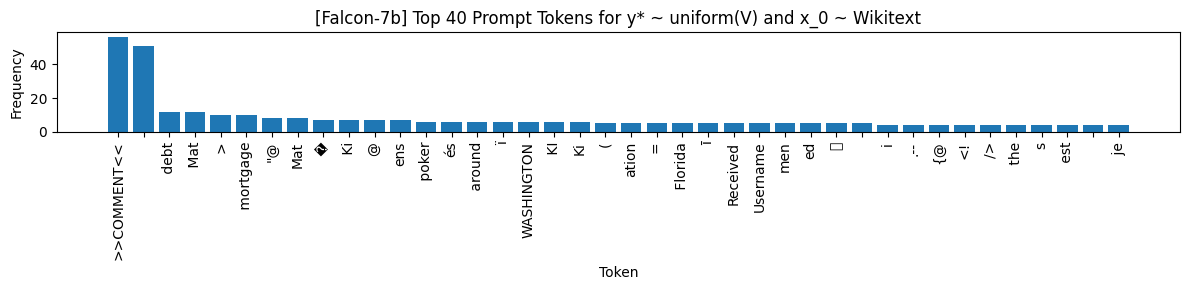

In [69]:
prompt_token_freqs = get_prompt_token_freqs(ranked_dive1_df, 
                                            falcon_tokenizer, 
                                            num_to_prompt=40, 
                                            title='[Falcon-7b] Top 40 Prompt Tokens for y* ~ uniform(V) and x_0 ~ Wikitext',
                                            output_path='figures/deep1_falcon7b_prompt_token_freqs.pdf')